In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
from itertools import product
from cloveFunctions import *


/home/tjm/anaconda3/lib/python3.4/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
bait = pd.read_csv('data/breast_CCLE_DEL_calls.csv.gz', compression='gzip', index_col=0)
prey = pd.read_csv('data/breast_mrna.tab.gz', compression='gzip', index_col=0, sep='\t')

In [10]:
merge = pd.merge(left=pd.DataFrame(bait.loc['BRCA1'], columns=['bait']), 
                 left_index=True,
                 right=pd.DataFrame(prey.loc['BRCA1'], columns=['prey']),
                 right_index=True)
merge

,bait,prey


In [4]:
%%time
print('combinations: ', len(bait)*len(prey))
for pair in product(bait.index, prey.index):
    pass



combinations:  378581892
CPU times: user 13.9 s, sys: 0 ns, total: 13.9 s
Wall time: 13.9 s


In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
matplotlib.use('Qt4Agg')
import matplotlib.pyplot as plt
from scipy import stats
from operator import itemgetter
from scipy.stats import sem
from scipy.stats import ks_2samp
from scipy.stats import probplot
import cloveFunctions as clv
import statsmodels.api as sm
import statsmodels.stats.power as smp
import pylab
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
import warnings
warnings.filterwarnings('ignore')
import networkx as nx

### TO DO:
    understand the dist of var and n of tcga brca - Het
    graph facets of tcga brca - Het - data according to above
    understand the dist of var and n of tcga brca - Hom
    graph facets of tcga brca - Hom - data according to above
    
    why are variances so high?
    are variance calculations done correctly?
    is there a pre-processing step needed before calculating var?

In [4]:
# exp and cnv data was originally wrangled in tcga_sandbox.ipynb
brca_cnv_het = pd.read_csv('brca_cnv_het.tab.gz', sep='\t', compression='gzip', index_col='gene_id') # 'tcga/brca_cnv_het.tab.gz'
# brca_cnv_hom = pd.read_csv('brca_cnv_hom.tab.gz', sep='\t', compression='gzip', index_col='gene_id') # 'tcga/brca_cnv_hom.tab.gz'
brca_exp = pd.read_csv('brca_exp.tab.gz', sep='\t', compression='gzip', index_col='gene_id') # 'tcga/brca_exp.tab.gz'

In [5]:
het_results = clv.randomPairContextStat(n_samp=1000000, expdf=brca_exp, cnvdf=brca_cnv_het, permute=True)

In [6]:
het_results.to_csv('brca_1M_clove.tab.gz', compression='gzip', sep='\t')

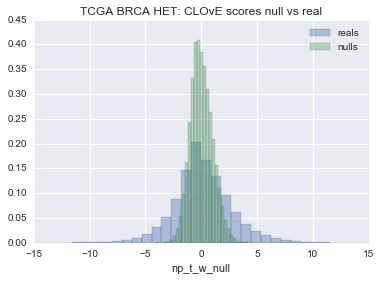

In [58]:
%matplotlib inline
sns.distplot(het_results[het_results['gene_var_exp']>10]['np_t_w'], kde=False, norm_hist=True, label='reals')
sns.distplot(het_results[het_results['gene_var_exp']>10]['np_t_w_null'], kde=False, norm_hist=True, label='nulls')
plt.title('TCGA BRCA HET: CLOvE scores null vs real')
plt.xlim(-15,15)
plt.legend()

In [86]:
het_results.sort_values(by='np_t_w', ascending=False)

,exp,cnv,pos_n,neg_n,pos_mu,neg_mu,pos_var,neg_var,cohens_d,np_t_w,np_p_w,np_t_w_null,t_shrnk_glob,gene_var_exp
440717,SUV39H2,RASA1,279,787,424.521975,198.347574,7.310434e+04,11219.285347,1.364683,19.585865,3.487828e-73,0.232289,1.012444,37335.666265
173354,FAM136A,LOC441081,280,786,1316.204733,775.856167,4.170684e+05,74337.444206,1.331580,19.132824,2.326855e-70,-0.669688,2.390395,221115.598618
111963,GTPBP4,GTF2H2,280,786,2323.088857,1244.016249,1.629737e+06,309349.706154,1.330869,19.122601,2.692377e-70,0.659842,4.571007,882507.007231
111957,GTPBP4,MIR4803,281,785,2311.883029,1246.652892,1.560721e+06,339494.608768,1.308577,18.823865,1.881379e-68,0.642248,4.526230,882507.007231
255466,RAD54L,GUSBP9,280,786,335.162135,137.401536,5.342926e+04,12411.076868,1.297561,18.644010,2.387487e-67,0.175024,0.886890,30788.322683
929349,ORC6L,POLR3G,277,789,290.983274,119.185143,3.122553e+04,13421.482689,1.277608,18.293531,3.257096e-65,1.697222,0.768380,23746.620960
122312,YEATS2,SERINC5,277,789,1566.284274,900.309402,6.197340e+05,156216.589377,1.264957,18.112376,4.056255e-64,0.819414,2.912224,362303.192192
145371,SRPK1,CETN3,278,788,2387.145522,1324.726862,1.844792e+06,314736.634458,1.256356,18.010247,1.671505e-63,0.107049,4.458616,932225.846411
42091,NUP93,RASGRF2,279,787,1354.906996,825.122824,3.057784e+05,137968.583676,1.241047,17.811442,2.599916e-62,0.860956,2.348225,236343.364620
333786,KCMF1,SPZ1,277,789,1748.243731,1192.522918,4.840499e+05,100597.631492,1.240726,17.765432,4.895410e-62,0.568356,2.443221,259877.251121


In [16]:
het_results[het_results['cnv'].str.contains('BRCA')].sort_values(by='np_t_w', ascending=False)

,exp,cnv,pos_n,neg_n,pos_mu,neg_mu,pos_var,neg_var,cohens_d,np_t_w,np_p_w,np_t_w_null,t_shrnk_glob,gene_var_exp
159823,POR,BRCA1,363,703,2042.322357,1637.620726,1.424082e+06,8.651726e+05,0.393549,6.089075,1.583794e-09,-0.881439,1.849978,1.093302e+06
162320,KIF23,BRCA2,428,638,680.562131,528.572043,1.982767e+05,1.762828e+05,0.352930,5.648618,2.074977e-08,-0.059860,0.753883,1.908435e+05
404627,HRH1,BRCA1,363,703,201.166294,156.556943,1.987285e+04,1.507421e+04,0.344788,5.334635,1.169306e-07,-1.121824,0.215682,1.717127e+04
635071,SOD2,BRCA1,363,703,5501.009311,3981.064145,4.243509e+07,1.235826e+07,0.319422,4.942157,8.969809e-07,0.697447,3.610916,2.314069e+07
458797,KPNA4,BRCA2,428,638,2118.814092,1927.505118,4.310985e+05,4.797251e+05,0.281743,4.509280,7.226585e-06,1.953956,0.937225,4.694366e+05
287612,TRAM2,BRCA1,363,703,1354.895842,1193.098715,3.452074e+05,3.054062e+05,0.286217,4.428408,1.047301e-05,0.034123,0.770570,3.251433e+05
550277,OR7E91P,BRCA2,428,638,22.002042,14.486016,1.435649e+03,4.360223e+02,0.259490,4.153120,3.542374e-05,-0.061550,0.037622,8.517470e+02
924070,CAMTA1,BRCA1,363,703,533.862984,474.575553,6.499547e+04,4.389315e+04,0.262080,4.054954,5.380103e-05,-0.594372,0.286097,5.191709e+04
181279,ARPC1B,BRCA1,363,703,3494.462762,2974.689465,4.585835e+06,3.847267e+06,0.256495,3.968550,7.716029e-05,-1.690840,2.107820,4.163344e+06
959934,CEP152,BRCA1,363,703,109.694225,93.503510,4.229170e+03,4.038184e+03,0.252520,3.907044,9.932926e-05,0.961345,0.078334,4.165996e+03


In [52]:
# find top druggable genes and drugs

top_bit = het_results.sort_values(by='np_t_w', ascending=False).head(1000)[['exp','np_t_w','np_p_w']]
top_bit.to_clipboard()

# copy only gene names here: http://www.dgidb.org/search_interactions
# then download tsv file to load in below cell

In [54]:
drugs = pd.read_csv('dgidb_export_2018-05-29.tsv', sep='\t')
drugs = drugs[drugs['interaction_types'] == 'inhibitor'][['gene','drug']]
drugs.columns = ['exp', 'drug']

In [56]:
drugs.tail

<bound method NDFrame.tail of          exp                                drug
18    DNMT3A                         AZACITIDINE
19    DNMT3A                          DECITABINE
26      ECE2                       PYRIMETHAMINE
27   NDUFAF4                              NV-128
28   NDUFAF4             METFORMIN HYDROCHLORIDE
29   NDUFAF4                              ME-344
30    PSMD14                    IXAZOMIB CITRATE
31    PSMD14                           OPROZOMIB
32    PSMD14                         CARFILZOMIB
33    PSMD14                          BORTEZOMIB
34      TPX2              N (g)-NITRO-L-ARGININE
42      ODC1                    ETHYLISOTHIOUREA
43      ODC1  EFLORNITHINE HYDROCHLORIDE HYDRATE
45      NAE1                        PEVONEDISTAT
46      PRKX                          GSK-690693
47      EZH2                       CHEMBL3287735
54      PLK1                          Cafusertib
55      PLK1                         NMS-1286937
56      PLK1                           

In [57]:
top_drugs = pd.merge(top_bit, drugs, how='inner', on=['exp'])
top_drugs[top_drugs['drug'].str.contains('IB') | top_drugs['drug'].str.contains('MAB') | top_drugs['drug'].str.contains('TAXEL')].drop_duplicates(['drug', 'exp']).to_clipboard()

# paste to presentation

In [61]:
# load into networkx
g1 = nx.from_pandas_dataframe(het_results, 'exp', 'cnv', ['np_t_w','np_p_w'])

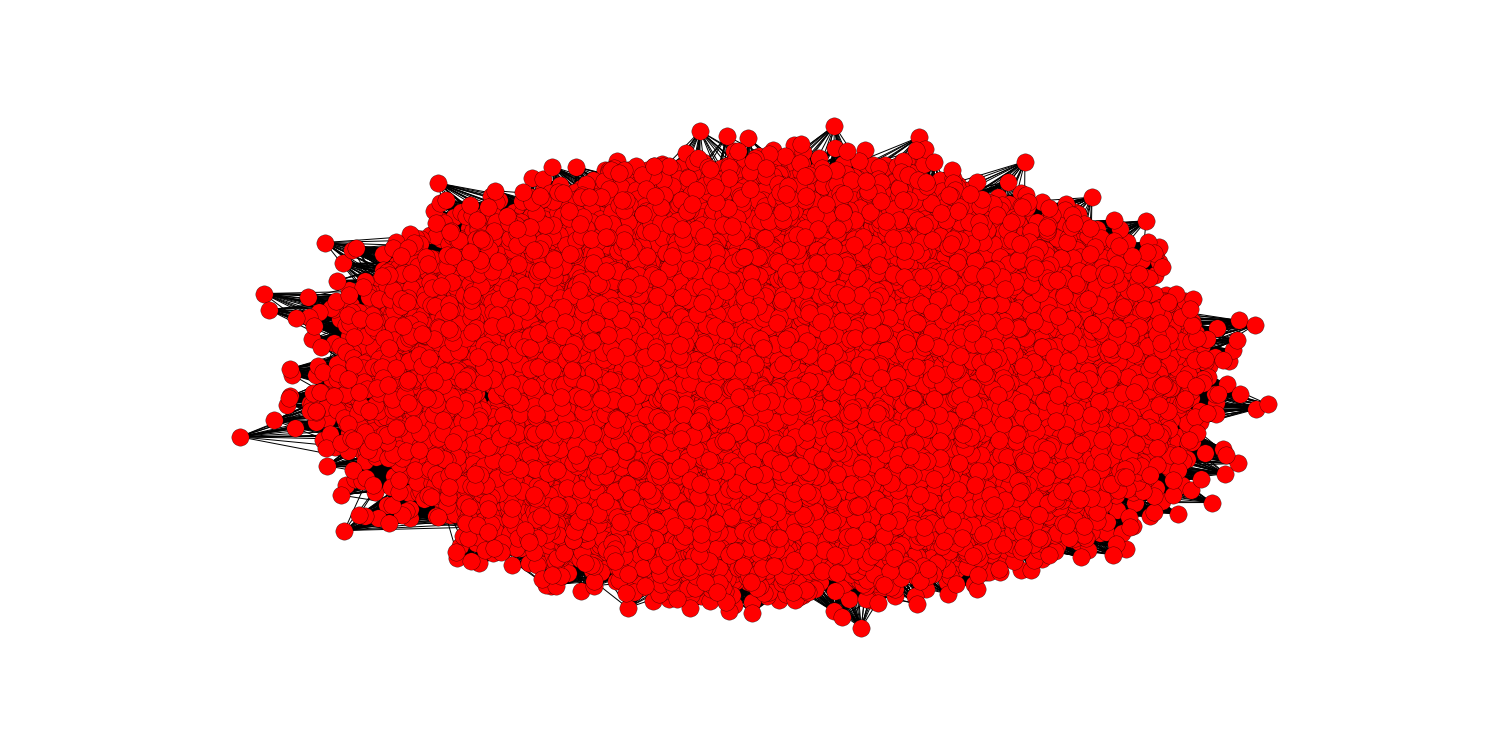

In [69]:
nx.draw(g1)

In [63]:
c1 = nx.find_cliques(g1)

In [85]:
print(nx.clustering(g1))

{'RP1-234P15.4': 0.001893939393939394, 'GPN1': 0.0020537714712471995, 'YWHAEP1': 0.0035460992907801418, 'OR5K3': 0.0021037868162692847, 'NICN1': 0.003495630461922597, 'PPP1R14C': 0.0027100271002710027, 'CT47A12': 0.001422475106685633, 'HNRNPA2B1': 0.0033320992225101815, 'OR4A47': 0.004118050789293068, 'PDZD4': 0.00392083644510829, 'GNPDA1': 0.0016362786348761104, 'ADAM9': 0.0032725572697522207, 'PLOD2': 0.001851851851851852, 'ZFP30': 0.0019536019536019536, 'CYGB': 0.0030643513789581204, 'METTL11A': 0.002844950213371266, 'NANOGNB': 0.009523809523809525, 'FAM8A1': 0.0039603960396039604, 'PRR19': 0.0030388031790556337, 'MTFR2': 0.003367003367003367, 'LOC728606': 0.004432624113475178, 'RMDN2-AS1': 0.006896551724137931, 'AC027269.2': 0.0049261083743842365, 'MIR4636': 0.004032258064516129, 'ANKRD22': 0.003481012658227848, 'CHST9': 0.002408912978018669, 'RNF148': 0.0026875699888017916, 'APC2': 0.003907203907203907, 'RBPJL': 0.004166666666666667, 'CYP39A1': 0.002866698518872432, 'SRP14': 0.001

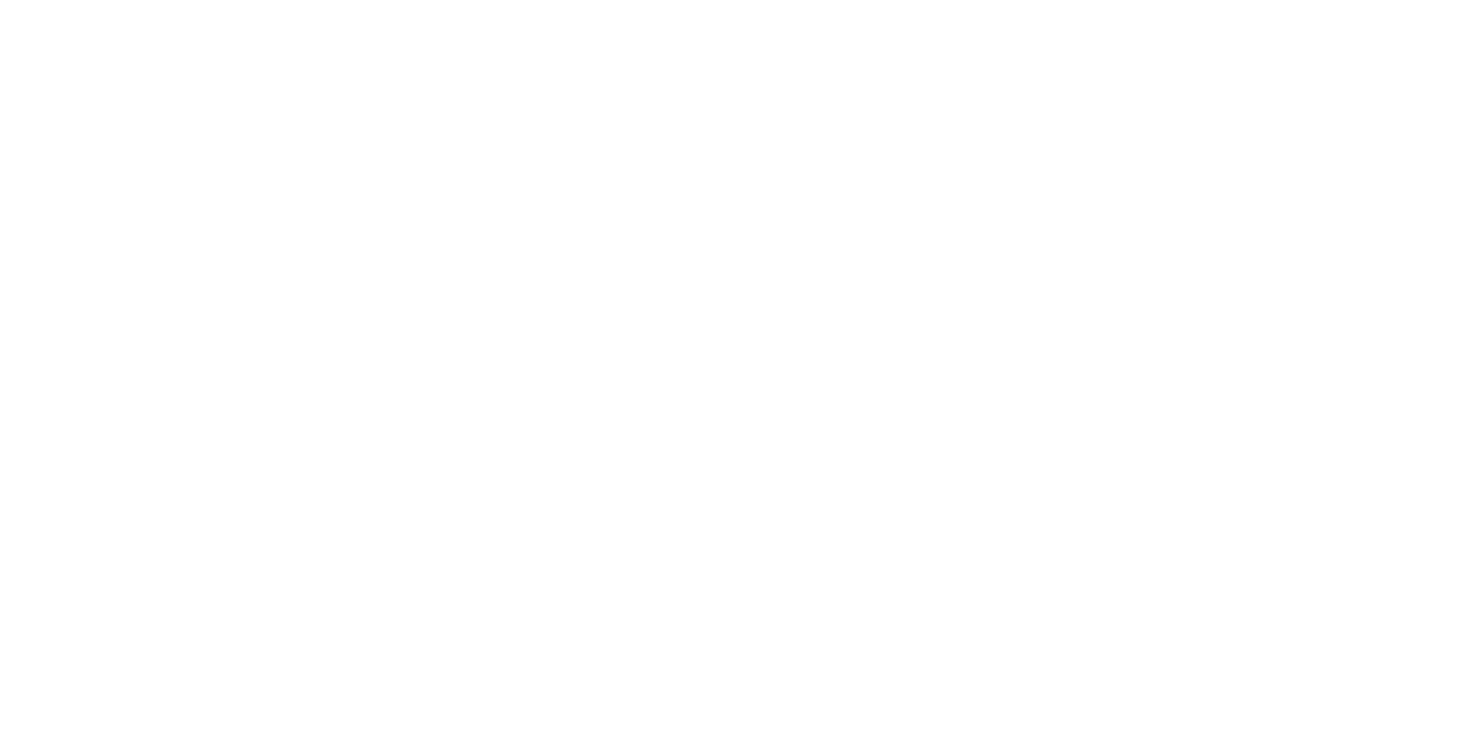

In [72]:
# Find all cliques of 4 or more nodes:
c1_4 = [clq for clq in c1 if len(clq) >= 4]

# Create a subgraph of g from all sufficiently large cliques:
nodes = set(n for clq in c1_4 for n in clq)
h = g1.subgraph(nodes)

# Drop nodes of h which have degree less than 4:
deg = nx.degree(h)
nodes = [n for n in nodes if deg[n] >= 4]

# The desired graph k is the subgraph of h with these nodes:
k = h.subgraph(nodes)
nx.draw(k)

In [83]:
#G is the networkx graph 
sub_graphs = list(nx.connected_component_subgraphs(g1))

#n gives the number of sub graphs
n = len(set(sub_graphs))

# you can now loop through all nodes in each sub graph
with open('g1_connected_component_subgraph_nodes.txt', 'w') as fh:
    for i in range(n):
#         print ("Subgraph:", i, "consists of this many genes: ", len(sub_graphs[i].nodes()), sub_graphs[i].nodes())
        print (len(sub_graphs[i].nodes()))
        for gene in sub_graphs[i].nodes():
            fh.write(gene+'\n')

27031


In [77]:
sub_graphs = nx.connected_component_subgraphs(g1)
sub_graphs.draw()

AttributeError: 'generator' object has no attribute 'draw'

In [84]:
import community

ImportError: No module named 'community'

In [ ]:
parts = community.best_partition(G_fb)
2
values = [parts.get(node) for node in G_fb.nodes()]


## LOAD DATA

In [5]:
# exp and cnv data was originally wrangled in tcga_sandbox.ipynb
brca_cnv_het = pd.read_csv('tcga/brca_cnv_het.tab.gz', sep='\t', compression='gzip', index_col='gene_id') # 'tcga/brca_cnv_het.tab.gz'
brca_cnv_hom = pd.read_csv('tcga/brca_cnv_hom.tab.gz', sep='\t', compression='gzip', index_col='gene_id') # 'tcga/brca_cnv_hom.tab.gz'
brca_exp = pd.read_csv('tcga/brca_exp.tab.gz', sep='\t', compression='gzip', index_col='gene_id') # 'tcga/brca_exp.tab.gz'

In [6]:
brca_cnv_het

,TCGA-AR-A24V-01A,TCGA-A7-A26H-01A,TCGA-EW-A6SB-01A,TCGA-C8-A137-01A,TCGA-S3-A6ZG-01A,TCGA-BH-A42T-01A,TCGA-OL-A5RU-01A,TCGA-AQ-A54N-01A,TCGA-AO-A0J3-01A,TCGA-A7-A5ZV-01A,...,TCGA-BH-A18L-01A,TCGA-AO-A1KT-01A,TCGA-AR-A24S-01A,TCGA-AO-A1KS-01A,TCGA-GM-A3XN-01A,TCGA-A2-A25E-01A,TCGA-E2-A15O-01A,TCGA-AR-A5QP-01A,TCGA-E9-A24A-01A,TCGA-AN-A0FJ-01A
gene_id,,,,,,,,,,,,,,,,,,,,,
ACAP3,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN
ACTRT2,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN
AGRN,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN
ANKRD65,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN
ATAD3A,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN
ATAD3B,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN
ATAD3C,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN
AURKAIP1,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN
B3GALT6,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN


# Permutation tests in TCGA-BRCA-HET
(heterozygous loss)

In [3]:
df = clv.randomPairContextStat(n_samp=1000000, expdf=brca_exp, cnvdf=brca_cnv_het, permute=True)

In [99]:
df.sort_values(by='np_t_w', ascending=False)

,exp,cnv,pos_n,neg_n,pos_mu,neg_mu,pos_var,neg_var,cohens_d,np_t_w,np_p_w,np_t_w_null,t_shrnk_glob,gene_var_exp
972772,CDCA7,JMY,280,786,507.376495,122.924751,2.157177e+05,3.154182e+04,1.358661,19.521934,8.769671e-73,-1.182998,1.713760,1.086454e+05
167881,CDCA8,LOC102503429,279,787,896.763740,365.395665,3.424642e+05,8.643622e+04,1.355223,19.450089,2.467445e-72,0.087085,2.353720,2.081983e+05
167874,CDCA8,MTRNR2L2,278,788,895.666272,366.457168,3.370664e+05,8.943364e+04,1.347226,19.312892,1.770098e-71,0.197036,2.341769,2.081983e+05
717787,CDC20,ARSB,280,786,1592.698373,571.956138,1.312934e+06,3.351609e+05,1.325416,19.044251,8.226656e-70,-0.798723,4.367177,7.945217e+05
33174,CENPA,PCDHGB6,232,834,326.797478,116.282432,6.304067e+04,1.210586e+04,1.381067,18.606428,4.053648e-67,-0.087961,0.884816,3.076578e+04
607427,HJURP,LOC102524628,278,788,559.562337,250.476663,9.772206e+04,4.239750e+04,1.295387,18.569766,6.790511e-67,-1.133894,1.380212,7.531294e+04
33144,CENPA,SLC22A5,252,814,316.059778,114.434274,5.984478e+04,1.211540e+04,1.316872,18.267427,4.688246e-65,0.064553,0.872715,3.076578e+04
23844,FAM171A1,MIR3607,278,788,1122.399861,324.685928,1.228889e+06,1.021621e+05,1.266463,18.155127,2.239547e-64,-1.446363,3.423500,5.191595e+05
112467,YEATS2,LOC644936,275,791,1566.400196,901.952982,6.247671e+05,1.567038e+05,1.260256,18.002586,1.858532e-63,-1.548955,2.898063,3.623032e+05
717804,CDC20,LOC102467212,261,805,1595.326085,595.196225,1.273508e+06,3.933319e+05,1.280557,17.977880,2.615933e-63,-1.488500,4.180541,7.945217e+05


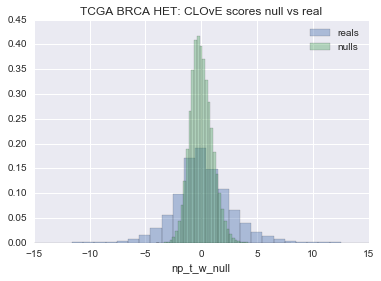

In [128]:
%matplotlib inline
sns.distplot(df[df['gene_var_exp']>10]['np_t_w'], kde=False, norm_hist=True, label='reals')
sns.distplot(df[df['gene_var_exp']>10]['np_t_w_null'], kde=False, norm_hist=True, label='nulls')
plt.title('TCGA BRCA HET: CLOvE scores null vs real')
plt.xlim(-15,15)
plt.legend()

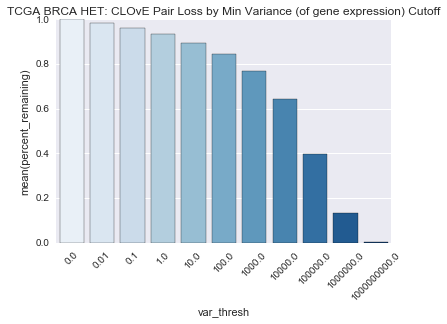

In [129]:
loss_list = [['var_thresh', 'percent_remaining']]
var_levels = [0, 0.01, 0.1, 1, 10, 100, 1000, 1e4, 1e5, 1e6, 1e9]
for x in var_levels[::-1]:
    lost = df[df['gene_var_exp'] >= x].shape[0] / df.shape[0]
    loss_list.append([x,lost])

header = loss_list.pop(0)
var_filter_df = pd.DataFrame(loss_list, columns=header)

%matplotlib inline
ax = sns.barplot(x="var_thresh", y="percent_remaining", data=var_filter_df, palette="Blues")
plt.title("TCGA BRCA HET: CLOvE Pair Loss by Min Variance (of gene expression) Cutoff")
for item in ax.get_xticklabels():
    item.set_rotation(45)
plt.show()

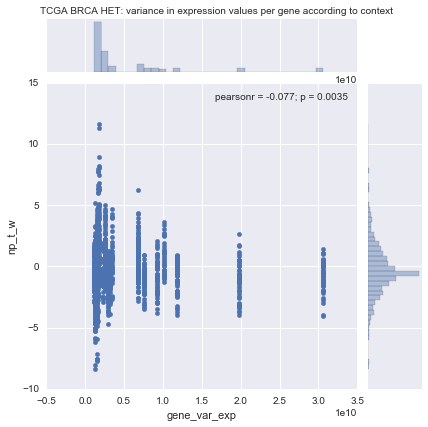

In [130]:
%matplotlib inline 
sns.jointplot(data=df[df['gene_var_exp']>1e9], y='np_t_w', x='gene_var_exp')
plt.suptitle('TCGA BRCA HET: variance in expression values per gene according to context')
plt.subplots_adjust(top=0.95)

compare CLOvE scores: BRCA TCGA with Breast CCLE

In [8]:
bexp, bcnv = clv.mainFitler('clove/tissueDF_raw/breast_mrna_df.pickle', var=0.2, n=7)
scores = clv.randomPairContextStat(1000000, bexp, bcnv, permute=True)

In [114]:
merge_BRCA_df = pd.merge(df[['exp','cnv','np_t_w','np_p_w']], scores[['exp','cnv','np_t_w','np_p_w']],  how='inner', left_on=['exp','cnv'], right_on = ['exp','cnv'])
merge_BRCA_df.columns = ['exp','cnv','tcga_np_t_w','tcga_np_p_w','ccle_np_t_w','ccle_np_p_w']

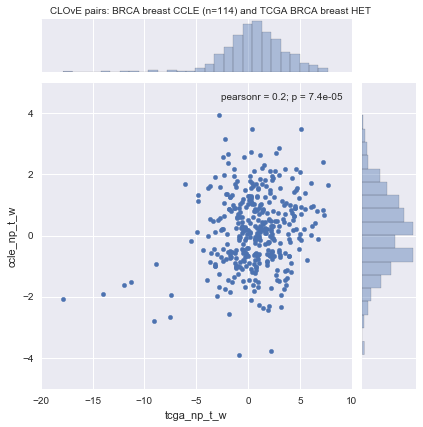

In [132]:
sns.jointplot(x='tcga_np_t_w', y='ccle_np_t_w', data=merge_BRCA_df)
plt.suptitle('CLOvE pairs: BRCA breast CCLE (n=114) and TCGA BRCA breast HET')
plt.subplots_adjust(top=0.95)

In [27]:
ccle_dels = pd.read_pickle('CCLE_DEL_calls.pickle')

ideas:


    create pickled df of breast_mrna_df of only brca_breast cell lines (12 lines)
    run cloves on the brca_breast_mrna_df
    compare cloves from brca_breast with tcga_brca cloves with joint plot
    
    
    create pickled df of all_mrna_df of only brca_all cell lines (115 lines)
    run cloves on the brca_all_mrna_df
    compare cloves from brca_all with tcga_brca cloves with joint plot
    
    repeat with lung adeno
    


In [52]:
brca_all_cells = pd.DataFrame((ccle_dels.loc['BRCA2'] == 1) | (ccle_dels.loc['BRCA1'] == 1)).reset_index()
brca_all_cells.columns = ['cell_line', 'brca_del']
brca_breast = brca_all_cells[(brca_all_cells['cell_line'].str.contains('BREAST')) & (brca_all_cells['brca_del']==True)]
brca_all = brca_all_cells[brca_all_cells['brca_del']==True]

In [67]:
# exp = pd.read_pickle('clove/allDF_raw/autonomic_ganglia_mrna_df.pickle')
# for filename in os.listdir('clove/allDF_raw/'):
#     if filename.endswith('mrna_df.pickle') and filename != 'autonomic_ganglia_mrna_df.pickle':
#         exp = exp.join(pd.read_pickle('clove/allDF_raw/'+filename))

exp.to_pickle('clove/allDF_raw/all_mrna.p')
exp.to_csv('clove/allDF_raw/all_mrna.tab.gz', compression='gzip', sep='\t')

In [73]:
exp[list(set(brca_breast['cell_line']).intersection(exp.columns))].to_pickle('clove/allDF_raw/breast_brca_mrna.p')
exp[list(set(brca_all['cell_line']).intersection(exp.columns))].to_pickle('clove/allDF_raw/breast_all_mrna.p')

In [78]:
bexp, bcnv = clv.mainFitler('clove/allDF_raw/breast_brca_mrna.p', var=0.2, n=7)
scores_brca_breast = clv.randomPairContextStat(1000000, bexp, bcnv, permute=True)
merge_brca_breast_df = pd.merge(df[['exp','cnv','np_t_w','np_p_w']], scores_brca_breast[['exp','cnv','np_t_w','np_p_w']],  how='inner', left_on=['exp','cnv'], right_on = ['exp','cnv'])
merge_brca_breast_df.columns = ['exp','cnv','tcga_np_t_w','tcga_np_p_w','ccle_np_t_w','ccle_np_p_w']

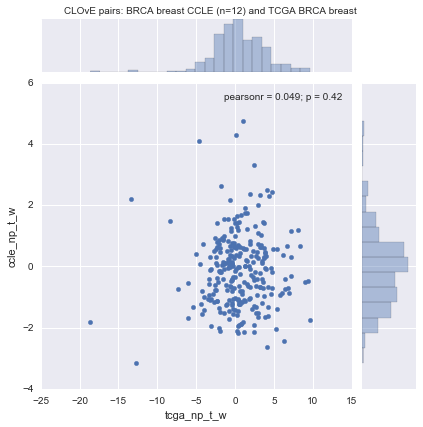

In [95]:
sns.jointplot(x='tcga_np_t_w', y='ccle_np_t_w', data=merge_brca_breast_df)
plt.suptitle('CLOvE pairs: BRCA breast CCLE (n=12) and TCGA BRCA breast HET')
plt.subplots_adjust(top=0.95)

In [133]:
bexp, bcnv = clv.mainFitler('clove/allDF_raw/breast_all_mrna.p', var=0.2, n=7)
scores_brca_all = clv.randomPairContextStat(1000000, bexp, bcnv, permute=True)
merge_brca_all_df = pd.merge(df[['exp','cnv','np_t_w','np_p_w','np_t_w_null']], scores_brca_all[['exp','cnv','np_t_w','np_p_w','np_t_w_null']],  how='inner', left_on=['exp','cnv'], right_on = ['exp','cnv'])
merge_brca_all_df.columns = ['exp','cnv','tcga_np_t_w','tcga_np_p_w','tcga_np_t_w_null','ccle_np_t_w','ccle_np_p_w','ccle_np_t_w_null']

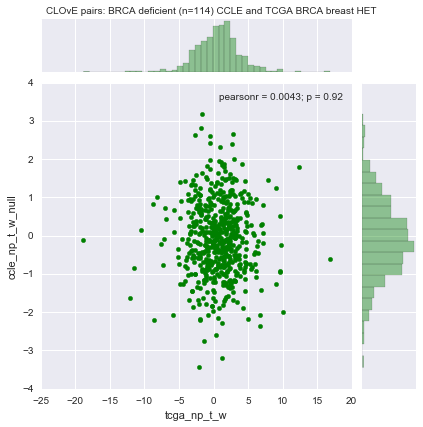

In [134]:
sns.jointplot(x='tcga_np_t_w', y='ccle_np_t_w_null', data=merge_brca_all_df, color='green')
plt.suptitle('CLOvE pairs: BRCA deficient (n=114) CCLE and TCGA BRCA breast HET')
plt.subplots_adjust(top=0.95)

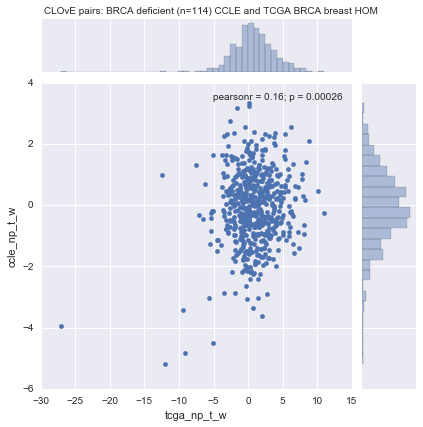

In [127]:
sns.jointplot(x='tcga_np_t_w', y='ccle_np_t_w', data=merge_brca_all_df)
plt.suptitle('CLOvE pairs: BRCA deficient (n=114) CCLE and TCGA BRCA breast HET')
plt.subplots_adjust(top=0.95)

# Permutation tests in TCGA-BRCA-HOM
(homozygous loss)

In [119]:
df_hom = clv.randomPairContextStat(n_samp=10000, expdf=brca_exp, cnvdf=brca_cnv_hom, permute=True)

In [120]:
df_hom.sort_values(by='np_t_w', ascending=False)

,exp,cnv,pos_n,neg_n,pos_mu,neg_mu,pos_var,neg_var,cohens_d,np_t_w,np_p_w,np_t_w_null,t_shrnk_glob,gene_var_exp
1757,IL17C,ZBTB21,2,1064,73.286601,1.359916,2.724464e+03,2.062302e+01,14.175891,20.028922,5.636807e-76,-0.311737,0.031781,3.541719e+01
1890,SOX15,SPCS2,3,1063,1072.010174,35.949023,1.986400e+06,9.918986e+03,8.319049,14.388725,5.028389e-43,-0.332095,0.512974,1.851107e+04
2254,GALNT12,MCAT,4,1062,1254.563718,83.438501,4.359525e+06,3.450469e+04,5.194545,10.369579,4.565952e-24,-0.367598,0.612563,5.591326e+04
3591,SHANK1,CYP17A1,3,1063,137.267769,10.493710,3.451346e+04,3.809848e+02,5.798880,10.029811,1.105158e-22,-0.259183,0.068465,5.226353e+02
3458,NARS2,TNS4,2,1064,3700.860977,461.792085,1.080173e+07,2.151984e+05,6.674557,9.430391,2.473557e-20,-0.210906,0.998557,2.549468e+05
902,TRAPPC6B,MIR22,3,1063,1592.702983,644.307042,1.569543e+06,3.999294e+04,4.501864,7.786477,1.627858e-14,0.092955,0.477775,4.686562e+04
1663,NKX2-6,MRFAP1,6,1060,1.559617,0.044492,1.216202e+01,2.024724e-01,2.914273,7.118364,2.005711e-12,-0.244754,0.001157,2.829004e-01
3113,SPIC,MIR4469,10,1056,9.909320,0.693354,8.158811e+02,1.286524e+01,2.038623,6.416384,2.096572e-10,0.262687,0.009072,2.120739e+01
3670,RNASE2,MIR4309,3,1063,87.374532,13.491644,6.577588e+03,3.890245e+02,3.661318,6.332659,3.548219e-10,-0.187844,0.039955,4.221556e+02
4499,FKBP9,AC226118.1,4,1062,7845.527344,3226.436203,3.286310e+07,2.120540e+06,3.086192,6.160792,1.025075e-09,0.035419,1.406651,2.317830e+06


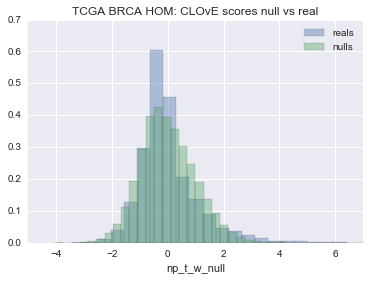

In [126]:
%matplotlib inline
sns.distplot(df_hom['np_t_w'], kde=False, norm_hist=True, label='reals')
sns.distplot(df['np_t_w_null'], kde=False, norm_hist=True, label='nulls')
plt.title('TCGA BRCA HOM: CLOvE scores null vs real')
plt.xlim(-5,7)
plt.legend()

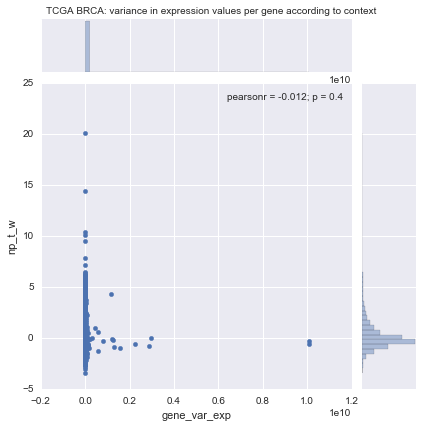

In [121]:
%matplotlib inline 
sns.jointplot(data=df_hom[df_hom['gene_var_exp']>1e4], y='np_t_w', x='gene_var_exp')
plt.suptitle('TCGA BRCA: variance in expression values per gene according to context')
plt.subplots_adjust(top=0.95)

### Graph percentage of genes lost by variance filter

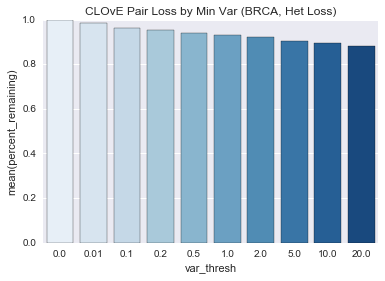

In [6]:
loss_list = [['var_thresh', 'percent_remaining']]
var_levels = [0, 0.01, 0.1, 0.2, 0.5, 1, 2, 5, 10, 20]
for x in var_levels[::-1]:
    lost = df[df['gene_var_exp'] >= x].shape[0] / df.shape[0]
    loss_list.append([x,lost])

header = loss_list.pop(0)
var_filter_df = pd.DataFrame(loss_list, columns=header)

%matplotlib inline
sns.barplot(x="var_thresh", y="percent_remaining", data=var_filter_df, palette="Blues")
plt.title("CLOvE Pair Loss by Min Var (BRCA, Het Loss)")
plt.show()


Graph percentage of genes lost by n filter

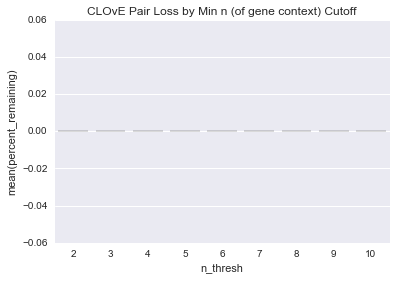

In [7]:
loss_list = [['n_thresh', 'percent_remaining']]
n_levels = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for n in n_levels:
    lost = df[(df['pos_n'] == n) | (df['neg_n'] == n)].shape[0] / df.shape[0]
    loss_list.append([n,lost])

header = loss_list.pop(0)
n_filter_df = pd.DataFrame(loss_list, columns=header)

%matplotlib inline
sns.barplot(x="n_thresh", y="percent_remaining", data=n_filter_df, palette="Blues")
plt.title("CLOvE Pair Loss by Min n (of gene context) Cutoff")
plt.show()

var and n threshold dropoff -- HETEROZYGOUS LOSS

In [19]:
pd.read_csv?

In [21]:
def dfFacetgrid(expdf, cnvdf, samps=10000):
    n_lis = [5,6,7,8,9,10,16,32]
    v_lis = [0.1, 0.2, 0.5, 1]
    bexp, bcnv = clv.powerFilter(expdf, cnvdf, var_thresh=v_lis[0], n_thresh=n_lis[0])
    scores = clv.randomPairContextStat(samps, bexp, bcnv, permute=True)
    print('scores for n={} and v={}:  {}'.format(n_lis[0], v_lis[0], scores.shape))
    out_df = scores[['np_t_w', 'np_t_w_null']]
    out_df['n'] = str(n_lis[0])
    out_df['v'] = str(v_lis[0])
    for n in n_lis[1:]:
        for v in v_lis[1:]:
            bexp, bcnv = clv.powerFilter(expdf, cnvdf, var_thresh=v, n_thresh=n)
            scores = clv.randomPairContextStat(samps, bexp, bcnv, permute=True)
            df = scores[['np_t_w', 'np_t_w_null']]
            df['n'] = str(n)
            df['v'] = str(v)
            out_df = pd.concat([out_df, df])
            print('scores for n={} and v={}:  {}'.format(n, v, scores.shape))
    return out_df

In [22]:
facet_df = dfFacetgrid(brca_exp, brca_cnv_het, samps=10)
facet_df
# facet_df.to_pickle('clove/filter_breast_facetGrid.p')

scores for n=5 and v=0.1:  (10, 14)
scores for n=6 and v=0.2:  (10, 14)
scores for n=6 and v=0.5:  (10, 14)
scores for n=6 and v=1:  (10, 14)
scores for n=7 and v=0.2:  (10, 14)
scores for n=7 and v=0.5:  (10, 14)
scores for n=7 and v=1:  (10, 14)
scores for n=8 and v=0.2:  (10, 14)
scores for n=8 and v=0.5:  (10, 14)
scores for n=8 and v=1:  (10, 14)
scores for n=9 and v=0.2:  (10, 14)
scores for n=9 and v=0.5:  (10, 14)
scores for n=9 and v=1:  (10, 14)
scores for n=10 and v=0.2:  (10, 14)
scores for n=10 and v=0.5:  (10, 14)
scores for n=10 and v=1:  (10, 14)
scores for n=16 and v=0.2:  (10, 14)
scores for n=16 and v=0.5:  (10, 14)
scores for n=16 and v=1:  (10, 14)
scores for n=32 and v=0.2:  (10, 14)
scores for n=32 and v=0.5:  (10, 14)
scores for n=32 and v=1:  (10, 14)


,np_t_w,np_t_w_null,n,v
0,1.865351,0.067297,5,0.1
1,2.118142,-0.097529,5,0.1
2,-0.354083,-0.522198,5,0.1
3,-1.611202,-1.748763,5,0.1
4,-1.365653,-0.953144,5,0.1
5,0.259608,-0.892839,5,0.1
6,-2.623913,1.051802,5,0.1
7,2.045301,0.729828,5,0.1
8,3.338532,-1.065764,5,0.1
9,7.235996,0.868509,5,0.1


# Subsample Unfiltered T-Stats
not finished, not sure if will ever use again

In [ ]:
samp = pd.read_pickle('breast_ttest_samp_context.p').sample(100000)
null = pd.read_pickle('breast_ttest_null_samp.p')
samp.shape[0] == null.shape[0]

In [86]:
seq1, seq2 = "AAAA", "ATTA"
sims = [seq1[i] != seq2[i] for i in range(min(len(seq1), len(seq2)))]
sum(sims)/len(sims)

0.75

# Permuation tests with n=7 and v=0.2 have highest t-test real vs null

...for breast cell lines, anyway

In [13]:
bexp, bcnv = clv.mainFitler('clove/tissueDF_raw/breast_mrna_df.pickle', var=0.2, n=7)
scores = clv.randomPairContextStat(1000000, bexp, bcnv, permute=True)

In [15]:
bcnv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21234 entries, A1BG to ZZZ3
Columns: 1030 entries, DMS53_LUNG to HOP92_LUNG
dtypes: int64(1030)
memory usage: 167.0+ MB


In [72]:
scores['zScore_n'] = (scores['np_t_w'] - scores['np_t_w_null'].mean()) / scores['np_t_w_null'].std()

In [78]:
scores[scores['np_t_w'] > 3][['exp','cnv','np_t_w','np_p_w','zScore_n']].sort_values(by='np_t_w', ascending=False)

,exp,cnv,np_t_w,np_p_w,zScore_n
118920,SND1,SEPT8,7.2756,1.1049e-09,7.16095
118927,SND1,HNRNPA0,7.2756,1.1049e-09,7.16095
70759,PSMD6,CD34,7.24559,1.23983e-09,7.13138
176094,TRIM37,LINC00538,6.43566,2.75598e-08,6.33347
176114,TRIM37,SERTAD4,6.43566,2.75598e-08,6.33347
178007,USP32,SERTAD4-AS1,6.4238,2.88333e-08,6.32179
58655,PPM1D,ATF3,6.05804,1.1554e-07,5.96145
124425,PHOSPHO2,MIR3676,5.99372,1.47286e-07,5.89809
29786,BPNT1,AJAP1,5.95042,1.73394e-07,5.85542
56326,C1orf27,ALDH3A2,5.93337,1.84888e-07,5.83863


In [77]:
scores[scores['exp'].str.contains('PARP')].sort_values(by='np_t_w', ascending=False)

,exp,cnv,pos_n,neg_n,pos_mu,neg_mu,pos_var,neg_var,cohens_d,np_t_w,np_p_w,np_t_w_null,t_shrnk_glob,gene_var_exp,zScore_n
155357,PARP1,CHTF8,6,53,11.704500,10.698927,0.543484,0.568725,1.313579,3.04961,0.00347291,1.14967,1.821919,0.669886,2.99765
155338,PARP1,LDHD,6,53,11.704500,10.698927,0.543484,0.568725,1.313579,3.04961,0.00347291,1.14967,1.821919,0.669886,2.99765
155340,PARP1,CECR3,2,57,12.410715,10.744714,0.354841,0.575101,2.173463,3.02119,0.00376568,0.715768,1.917790,0.669886,2.96966
155352,PARP1,ICMT,9,50,11.485683,10.677979,0.529454,0.582250,1.047692,2.89344,0.00538921,2.31495,1.745393,0.669886,2.8438
155328,PARP1,SLC39A14,22,37,11.170969,10.581319,0.474178,0.638502,0.762838,2.83347,0.00635668,0.536313,1.714806,0.669886,2.78472
155318,PARP1,AOC4,9,50,11.429639,10.688067,0.202578,0.656717,0.951004,2.62641,0.0110628,0.878995,1.751213,0.669886,2.58073
47640,PARPBP,SIRPB1,5,54,8.248329,7.319322,0.612897,0.657252,1.129562,2.41638,0.0189007,-1.85175,1.518659,0.732856,2.37382
47652,PARPBP,SRR,11,48,7.917029,7.279119,0.545600,0.684633,0.772544,2.31108,0.0244674,-0.325289,1.477867,0.732856,2.27008
44922,PARP2,RPL23AP53,22,37,10.043857,9.656338,0.441750,0.399693,0.590996,2.19518,0.0322378,-0.280279,1.166770,0.458258,2.1559
47649,PARPBP,SCRT2,4,55,8.250980,7.336020,0.574892,0.674264,1.100726,2.12552,0.0378893,-1.31863,1.364144,0.732856,2.08727


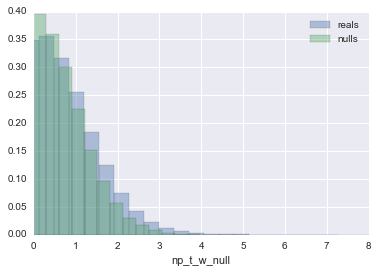

In [81]:
%matplotlib inline
sns.distplot(scores['np_t_w'], kde=False, norm_hist=True, label='reals')
sns.distplot(scores['np_t_w_null'], kde=False, norm_hist=True, label='nulls')
plt.xlim(0,8)
plt.legend()

# Permuation tests with varying n

unifed call to randomPairContextStat for permuted data (new style)

In [2]:
import cloveFunctions as clv

In [19]:
exp_breast = pd.read_pickle('clove/tissueDF_raw/breast_mrna_df.pickle')
cdel = pd.read_pickle('CCLE_DEL_calls.pickle')
cdel_breast = cdel[exp_breast.columns]
cell = pd.read_pickle('ccle_cell_info_df.pickle')

def dfFacetgrid(raw_exp_df_fh):
    n_lis = [5,6,7,8,9,10,16,32]
    v_lis = [0.1, 0.2, 0.5, 1]
    bexp, bcnv = clv.mainFitler(raw_exp_df_fh, var=v_lis[0], n=n_lis[0])
    scores = clv.randomPairContextStat(10000, bexp, bcnv, permute=True)
    print('scores for n={} and v={}:  {}'.format(n_lis[0], v_lis[0], scores.shape))
    out_df = scores[['np_t_w', 'np_t_w_null']]
    out_df['n'] = str(n_lis[0])
    out_df['v'] = str(v_lis[0])
    for n in n_lis[1:]:
        for v in v_lis[1:]:
            bexp, bcnv = clv.mainFitler(raw_exp_df_fh, var=v, n=n)
            scores = clv.randomPairContextStat(10000, bexp, bcnv, permute=True)
            df = scores[['np_t_w', 'np_t_w_null']]
            df['n'] = str(n)
            df['v'] = str(v)
            out_df = pd.concat([out_df, df])
            print('scores for n={} and v={}:  {}'.format(n, v, scores.shape))
    return out_df

breast facet (seems incomplete -- missing entire graphs)

In [20]:
facet_df = dfFacetgrid('clove/tissueDF_raw/breast_mrna_df.pickle')
facet_df.to_pickle('clove/filter_breast_facetGrid.p')

scores for n=5 and v=0.1:  (2030, 14)
scores for n=6 and v=0.2:  (2206, 14)
scores for n=6 and v=0.5:  (1314, 14)
scores for n=6 and v=1:  (504, 14)
scores for n=7 and v=0.2:  (2144, 14)
scores for n=7 and v=0.5:  (1410, 14)
scores for n=7 and v=1:  (520, 14)
scores for n=8 and v=0.2:  (2240, 14)
scores for n=8 and v=0.5:  (1358, 14)
scores for n=8 and v=1:  (525, 14)
scores for n=9 and v=0.2:  (2303, 14)
scores for n=9 and v=0.5:  (1381, 14)
scores for n=9 and v=1:  (518, 14)
scores for n=10 and v=0.2:  (2280, 14)
scores for n=10 and v=0.5:  (1432, 14)
scores for n=10 and v=1:  (536, 14)
scores for n=16 and v=0.2:  (2546, 14)
scores for n=16 and v=0.5:  (1614, 14)
scores for n=16 and v=1:  (626, 14)
scores for n=32 and v=0.2:  (3040, 14)
scores for n=32 and v=0.5:  (1929, 14)
scores for n=32 and v=1:  (704, 14)


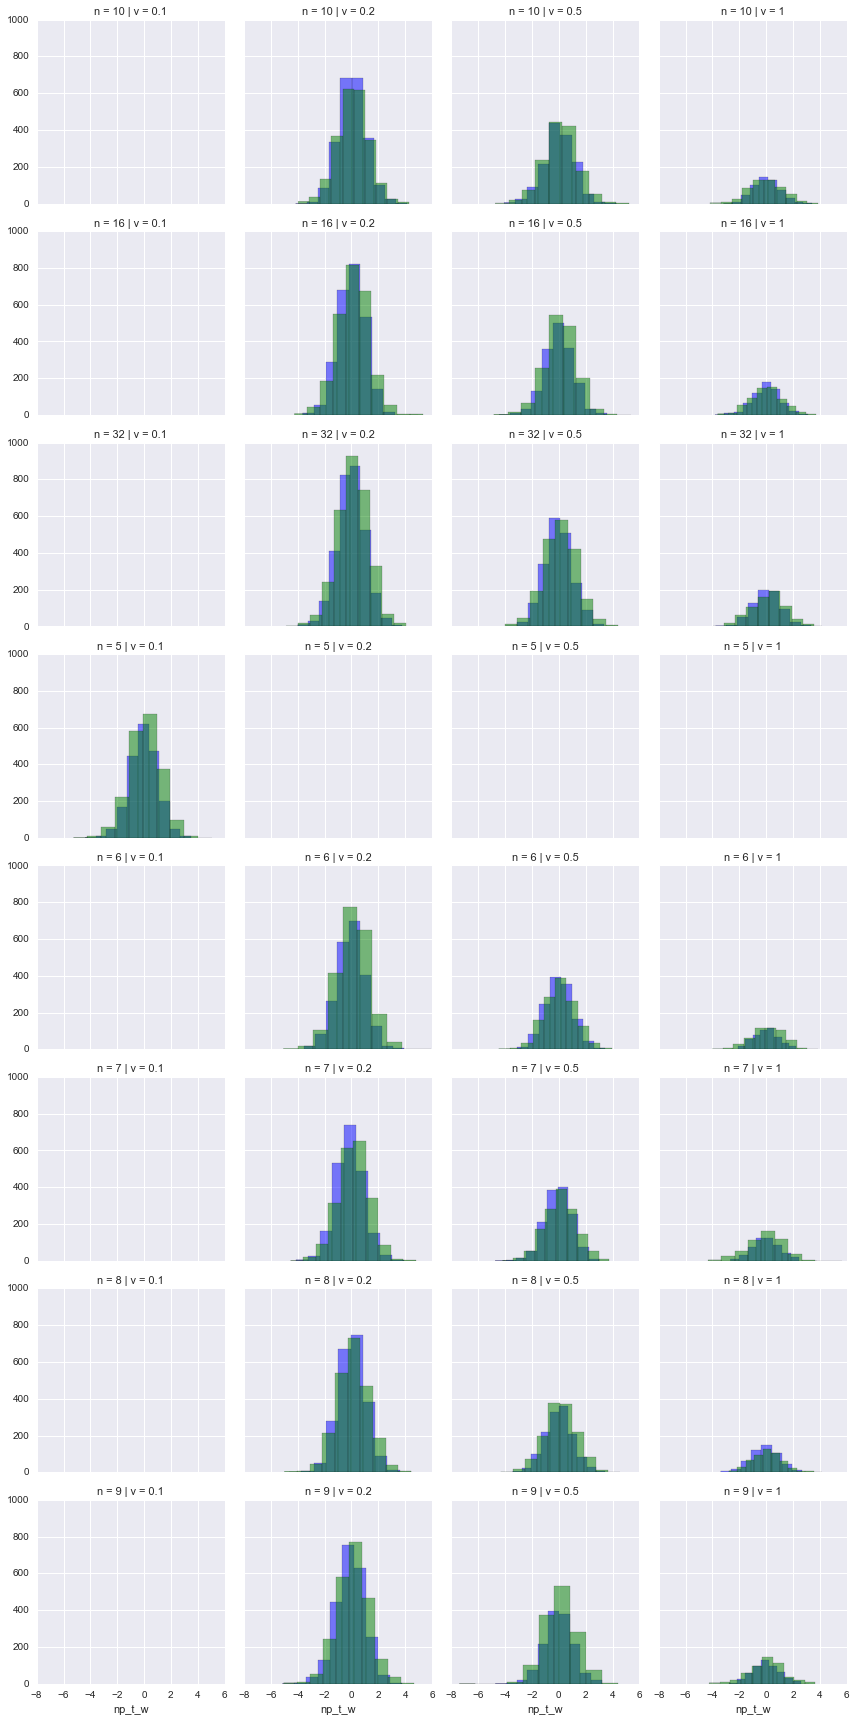

In [24]:
f = sns.FacetGrid(facet_df, col="v",  row="n")
f = f.map(plt.hist, "np_t_w_null", color='blue', alpha=0.5)
f = f.map(plt.hist, "np_t_w", color='green', alpha=0.5)

In [43]:
import scipy
facet_breast = pd.read_pickle('clove/filter_breast_facetGrid.p')
lis = []
for n in facet_breast['n'].unique():
    for v in facet_breast['v'].unique():
        df = facet_breast[(facet_breast['n'] == n) & (facet_breast['v'] == v)]
        if df.shape[0] > 0:
            ts, tp = scipy.stats.ttest_ind(df['np_t_w'], df['np_t_w_null'])
            ds, dp = scipy.stats.ks_2samp(df['np_t_w'], df['np_t_w_null'])
            lis.append([n, v, ts, tp, ds, dp])
b_result = pd.DataFrame(lis, columns=['n', 'v', 'ts', 'tp', 'ds', 'dp'])
b_result.sort_values(by='ts', ascending=False)

,n,v,ts,tp,ds,dp
4,7,0.2,7.646562,2.532235e-14,0.124067,7.249319e-15
1,6,0.2,5.376988,7.965756e-08,0.101088,2.741972e-10
19,32,0.2,5.336604,9.813213e-08,0.081579,2.878191e-09
10,9,0.2,5.065729,4.227523e-07,0.076856,2.239172e-06
5,7,0.5,4.390595,1.172040e-05,0.090780,1.611722e-05
20,32,0.5,3.644469,2.714753e-04,0.078797,1.142710e-05
17,16,0.5,3.538380,4.082692e-04,0.070012,6.841051e-04
11,9,0.5,3.434215,6.030375e-04,0.083997,1.069840e-04
8,8,0.5,3.265731,1.105396e-03,0.086892,6.390210e-05
16,16,0.2,3.237803,1.212262e-03,0.060880,1.494660e-04


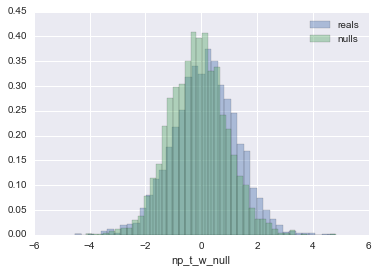

In [65]:
top_facet_breast = facet_breast[(facet_breast['n']=='7') & (facet_breast['v']=='0.2')]

%matplotlib inline
sns.distplot(top_facet_breast['np_t_w'], kde=False, norm_hist=True, label='reals')
sns.distplot(top_facet_breast['np_t_w_null'], kde=False, norm_hist=True, label='nulls')
plt.legend()

(0, 6)

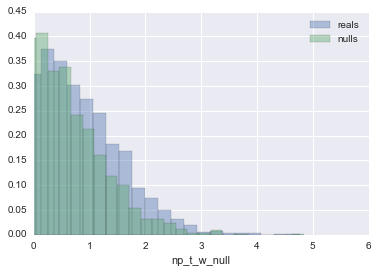

In [79]:
top_facet_breast = facet_breast[(facet_breast['n']=='7') & (facet_breast['v']=='0.2')]

%matplotlib inline
sns.distplot(top_facet_breast['np_t_w'], kde=False, norm_hist=True, label='reals')
sns.distplot(top_facet_breast['np_t_w_null'], kde=False, norm_hist=True, label='nulls')
plt.legend()
plt.xlim(0,6)

lung facet

In [25]:
facet_df = dfFacetgrid('clove/tissueDF_raw/lung_mrna_df.pickle')
facet_df.to_pickle('clove/filter_lung_facetGrid.p')

scores for n=5 and v=0.1:  (2445, 14)
scores for n=6 and v=0.2:  (2636, 14)
scores for n=6 and v=0.5:  (1318, 14)
scores for n=6 and v=1:  (332, 14)
scores for n=7 and v=0.2:  (2656, 14)
scores for n=7 and v=0.5:  (1283, 14)
scores for n=7 and v=1:  (310, 14)
scores for n=8 and v=0.2:  (2670, 14)
scores for n=8 and v=0.5:  (1362, 14)
scores for n=8 and v=1:  (305, 14)
scores for n=9 and v=0.2:  (2761, 14)
scores for n=9 and v=0.5:  (1350, 14)
scores for n=9 and v=1:  (330, 14)
scores for n=10 and v=0.2:  (2776, 14)
scores for n=10 and v=0.5:  (1403, 14)
scores for n=10 and v=1:  (348, 14)
scores for n=16 and v=0.2:  (2858, 14)
scores for n=16 and v=0.5:  (1500, 14)
scores for n=16 and v=1:  (341, 14)
scores for n=32 and v=0.2:  (3089, 14)
scores for n=32 and v=0.5:  (1535, 14)
scores for n=32 and v=1:  (344, 14)


In [41]:
import scipy
facet_lung = pd.read_pickle('clove/filter_lung_facetGrid.p')
lis = []
for n in facet_lung['n'].unique():
    for v in facet_lung['v'].unique():
        df = facet_lung[(facet_lung['n'] == n) & (facet_lung['v'] == v)]
        if df.shape[0] > 0:
            ts, tp = scipy.stats.ttest_ind(df['np_t_w'], df['np_t_w_null'])
            ds, dp = scipy.stats.ks_2samp(df['np_t_w'], df['np_t_w_null'])
            lis.append([n, v, ts, tp, ds, dp])
l_result = pd.DataFrame(lis, columns=['n', 'v', 'ts', 'tp', 'ds', 'dp'])
l_result.sort_values(by='ts')

,n,v,ts,tp,ds,dp
5,7,0.5,-2.419635,0.015605,0.069369,0.003921
19,32,0.2,-2.349154,0.018847,0.053092,0.000313
7,8,0.2,-1.705376,0.088183,0.033708,0.094314
2,6,0.5,-1.161757,0.245439,0.041730,0.196866
1,6,0.2,-1.114581,0.265081,0.048179,0.004223
6,7,1,-1.025254,0.305644,0.070968,0.402910
11,9,0.5,-0.585892,0.557997,0.054074,0.037175
8,8,0.5,-0.432541,0.665383,0.052129,0.047674
3,6,1,-0.184094,0.853996,0.051205,0.766334
18,16,1,-0.178650,0.858266,0.079179,0.225737


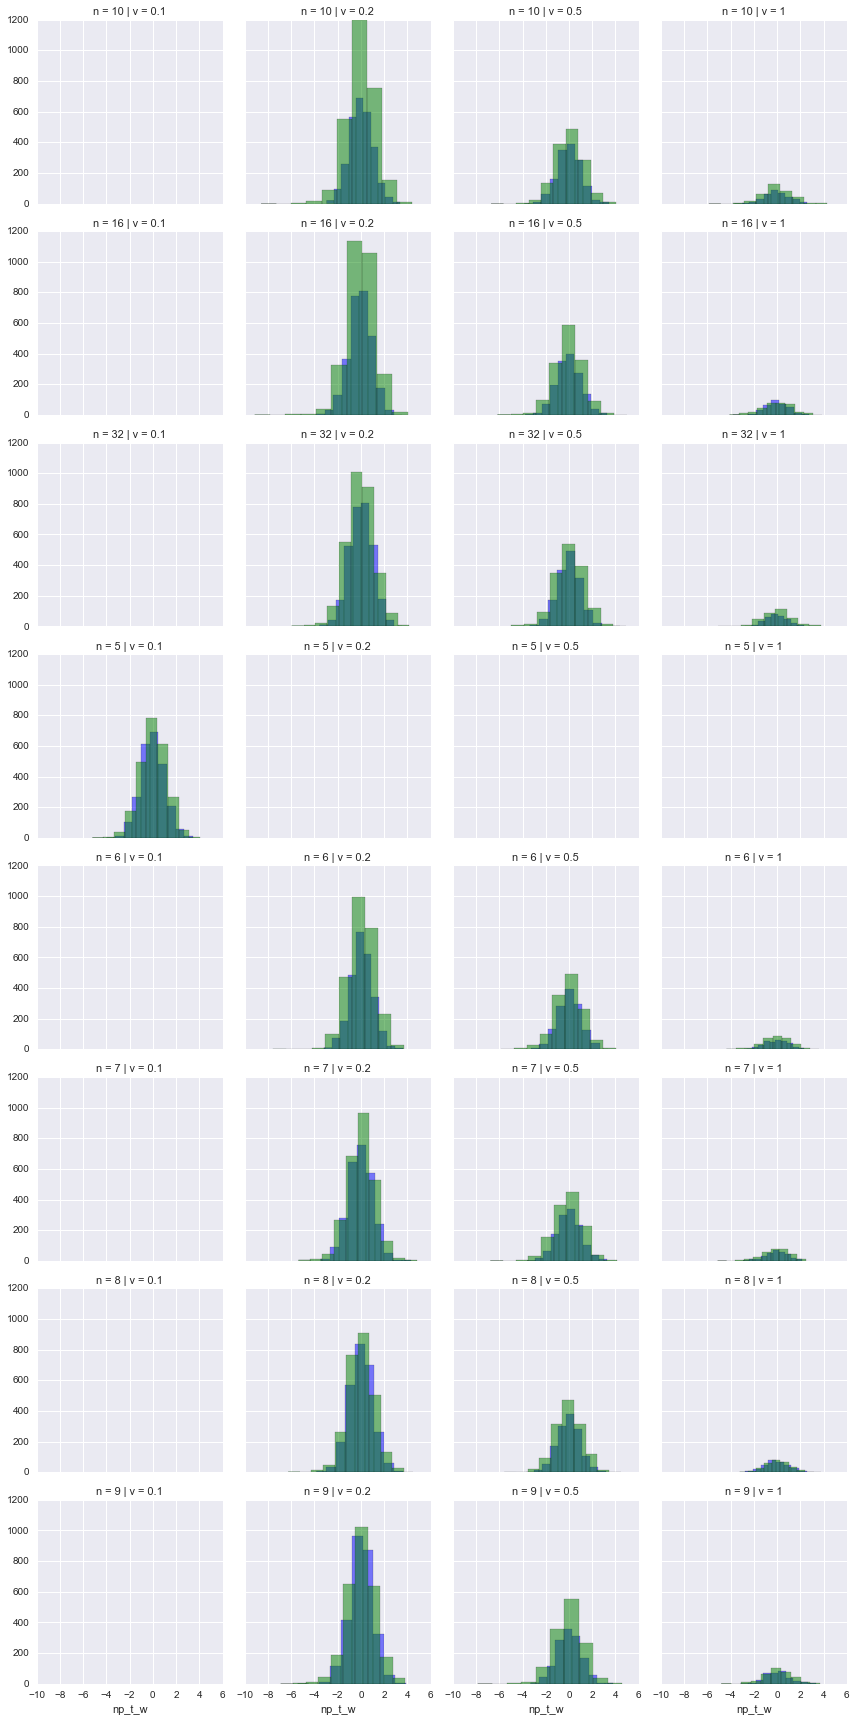

In [26]:
f = sns.FacetGrid(facet_df, col="v",  row="n")
f = f.map(plt.hist, "np_t_w_null", color='blue', alpha=0.5)
f = f.map(plt.hist, "np_t_w", color='green', alpha=0.5)

subsample of clove distribution in breast, green-null, blue-real, red-shrunk real

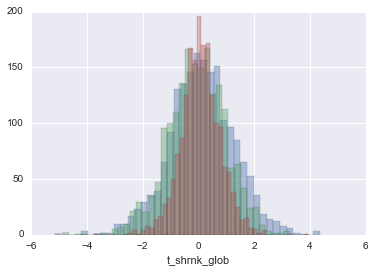

In [8]:
%matplotlib inline
sns.distplot(output['np_t_w'], kde=False, label='reals')
sns.distplot(output['np_t_w_null'], kde=False, label='nulls')
sns.distplot(output['t_shrnk_glob'], kde=False, label='reals')

separate call to randomPairContextStat for permuted data (old style)

lung comparison

In [1]:
import cloveFunctions as clv
import pandas as pd
import numpy as np
import seaborn as sns
import m

In [2]:
exp_lung = pd.read_pickle('clove/tissueDF_raw/lung_mrna_df.pickle')
cdel = pd.read_pickle('CCLE_DEL_calls.pickle')
exp_lung.columns = [col.strip() for col in exp_lung.columns]
cdel.columns = [col.strip() for col in cdel.columns]
cdel_lung = cdel[list(set(cdel.columns).intersection(exp_lung.columns))]
# cell = pd.read_pickle('ccle_cell_info_df.pickle')

In [3]:
# bexp, bcnv = clv.mainFitler('clove/tissueDF_raw/lung_mrna_df.pickle', var=0.0, n=2)
lexp, lcnv = exp_lung, cdel_lung
results_real = clv.randomPairContextStat(10000, lexp, lcnv)
results_null = clv.randomPairContextStat(10000, lexp, lcnv, permute=True)

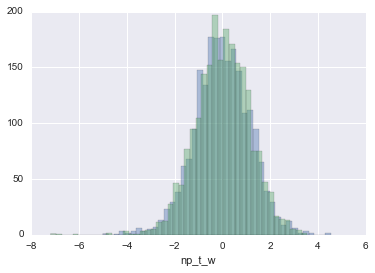

In [6]:
%matplotlib inline
sns.distplot(results_real['np_t_w'], kde=False, label='reals')
sns.distplot(results_null['np_t_w'], kde=False, label='nulls')

BRCA comparison

In [2]:
import cloveFunctions as clv

In [18]:
exp_breast = pd.read_pickle('clove/tissueDF_raw/breast_mrna_df.pickle')
cdel = pd.read_pickle('CCLE_DEL_calls.pickle')
cdel_breast = cdel[exp_breast.columns]
cell = pd.read_pickle('ccle_cell_info_df.pickle')

In [19]:
bexp, bcnv = clv.mainFitler('clove/tissueDF_raw/breast_mrna_df.pickle', var=0.0, n=2)
results_real = clv.randomPairContextStat(10000, bexp, bcnv)
results_null = clv.randomPairContextStat(10000, bexp, bcnv, permute=True)

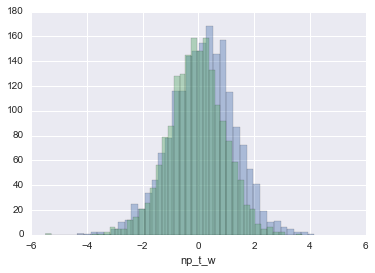

In [20]:
%matplotlib inline
sns.distplot(results_real['np_t_w'], kde=False, label='reals')
sns.distplot(results_null['np_t_w'], kde=False, label='nulls')

# Formalize Filters (var and n) based on power analysis

In [2]:
import cloveFunctions as clv

In [24]:
exp_breast = pd.read_pickle('clove/tissueDF_raw/breast_mrna_df.pickle')
cdel = pd.read_pickle('CCLE_DEL_calls.pickle')
cdel_breast = cdel[exp_breast.columns]
cell = pd.read_pickle('ccle_cell_info_df.pickle')

sample run below

In [25]:
df = clv.randomPairContextStat(n_samp=10, expdf=exp_breast, cnvdf=cdel_breast)

In [28]:
exp_breast.head(10)

,AU565_BREAST,BT20_BREAST,BT474_BREAST,BT483_BREAST,BT549_BREAST,CAL120_BREAST,CAL148_BREAST,CAL51_BREAST,CAL851_BREAST,CAMA1_BREAST,...,MDAMB436_BREAST,MDAMB453_BREAST,MDAMB468_BREAST,SKBR3_BREAST,T47D_BREAST,UACC812_BREAST,UACC893_BREAST,YMB1_BREAST,ZR751_BREAST,ZR7530_BREAST
1/2-SBSRNA4,NaN,NaN,5.401017,5.717574,5.030948,6.448201,5.862162,6.607692,4.712810,5.230651,...,NaN,5.178795,4.992288,5.285821,NaN,6.137365,5.673962,5.461494,NaN,5.352480
A1BG,NaN,NaN,NaN,6.799552,7.599171,8.221060,6.371130,6.126693,NaN,7.742350,...,6.824272,7.822566,NaN,NaN,6.638034,7.041119,NaN,8.521523,7.731496,6.945533
A1BG-AS1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5.584081,NaN,NaN,NaN,NaN
A2LD1,NaN,NaN,6.085782,6.441127,7.877578,5.075992,6.696254,7.141233,6.933365,6.505857,...,6.193615,4.966001,6.616900,6.069765,6.190813,4.239530,6.767208,6.553315,6.368450,6.027463
A2M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,7.406219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A2ML1,4.818356,4.184284,NaN,NaN,NaN,NaN,6.730723,NaN,6.400949,NaN,...,NaN,NaN,NaN,5.900330,NaN,NaN,4.164136,NaN,NaN,NaN
A4GALT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A4GNT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.388632,NaN
AA06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.168221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAAS,9.229649,8.208900,7.934789,7.726963,8.577770,7.685151,8.476448,8.478623,NaN,NaN,...,7.993578,8.429693,8.486038,8.545306,8.629433,8.173907,8.252124,7.589940,NaN,7.935206


Graph percentage of genes lost by variance filter

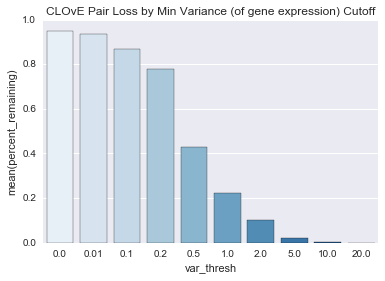

In [21]:
loss_list = [['var_thresh', 'percent_remaining']]
var_levels = [0, 0.01, 0.1, 0.2, 0.5, 1, 2, 5, 10, 20]
for x in var_levels[::-1]:
    lost = df[df['gene_var_exp'] >= x].shape[0] / df.shape[0]
    loss_list.append([x,lost])

header = loss_list.pop(0)
var_filter_df = pd.DataFrame(loss_list, columns=header)

%matplotlib inline
sns.barplot(x="var_thresh", y="percent_remaining", data=var_filter_df, palette="Blues")
plt.title("CLOvE Pair Loss by Min Variance (of gene expression) Cutoff")
plt.show()


Graph percentage of genes lost by n filter

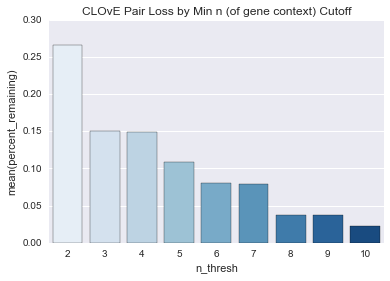

In [24]:
loss_list = [['n_thresh', 'percent_remaining']]
n_levels = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for n in n_levels:
    lost = df[(df['pos_n'] == n) | (df['neg_n'] == n)].shape[0] / df.shape[0]
    loss_list.append([n,lost])

header = loss_list.pop(0)
n_filter_df = pd.DataFrame(loss_list, columns=header)

%matplotlib inline
sns.barplot(x="n_thresh", y="percent_remaining", data=n_filter_df, palette="Blues")
plt.title("CLOvE Pair Loss by Min n (of gene context) Cutoff")
plt.show()

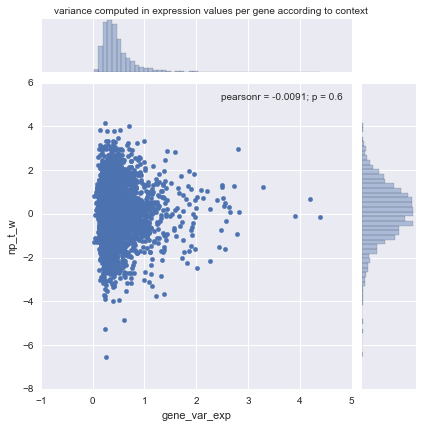

In [18]:
%matplotlib inline 
sns.jointplot(data=df, y='np_t_w', x='gene_var_exp')
plt.suptitle('variance computed in expression values per gene according to context')
plt.subplots_adjust(top=0.95)

Try some variance cutoffs!

variance computed in expression values per gene according to context


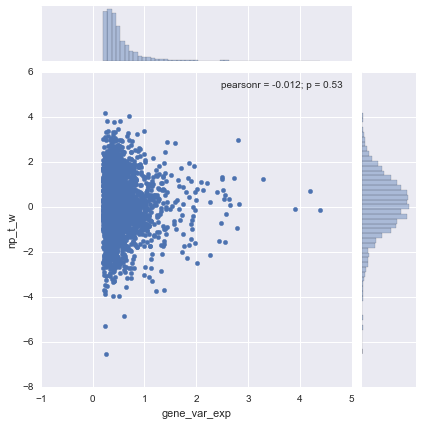

In [22]:
var_cutoff = 0.2
result = df[df['gene_var_exp'] >= var_cutoff]

%matplotlib inline 
print("variance computed in expression values per gene according to context")
sns.jointplot(data=result, y='np_t_w', x='gene_var_exp')

Add global variance from expression values to each gene's expression variance (similar to SAM)

In [23]:
global_var = pd.Series(exp_breast.values.flatten()).dropna().var()

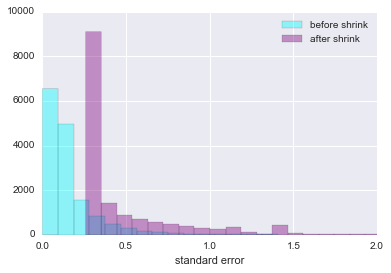

In [24]:
exp_shrink = pd.DataFrame(exp_breast.count(axis=1), columns=['n'])
exp_shrink['var_1'] = exp_breast.var(axis=1)
exp_shrink['std_1'] = exp_breast.std(axis=1)
exp_shrink['se_1'] = exp_shrink['std_1']/np.sqrt(exp_shrink['n'])

exp_shrink['var_2'] = exp_shrink['var_1']+global_var
exp_shrink['std_2'] = np.sqrt(exp_shrink['var_2'])
exp_shrink['se_2'] = exp_shrink['std_2']/np.sqrt(exp_shrink['n'])

exp_shrink.dropna(how='any',inplace='True')

%matplotlib inline
sns.distplot(exp_shrink['se_1'], kde=False, label='before shrink', color='cyan')
sns.distplot(exp_shrink['se_2'], kde=False, label='after shrink', color='purple')
plt.xlim(0,2)
plt.xlabel('standard error')
plt.legend()



Shrinkage attempt via addition of either global or local gene var to sample vars

In [25]:
sdf = df.dropna()
# params: t_welch(nx, ny, mx, my, vx, vy, fudge, tails=2)

# global (all genes in expression matrix)
sdf['t_shrnk_glob'] = np.vectorize(t_welch)(sdf['pos_n'], sdf['neg_n'], sdf['pos_mu'], sdf['neg_mu'], sdf['pos_var'], sdf['neg_var'], global_var)

# local (variance across single gene expression)
sdf['t_shrnk_locl'] = np.vectorize(t_welch)(sdf['pos_n'], sdf['neg_n'], sdf['pos_mu'], sdf['neg_mu'], sdf['pos_var'], sdf['neg_var'], sdf['gene_var_exp'])

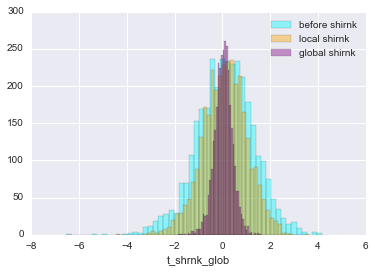

In [97]:
%matplotlib inline
sns.distplot(sdf['np_t_w'], label='before shirnk', kde=False,color='cyan')
sns.distplot(sdf['t_shrnk_locl'], label='local shirnk', kde=False,color='orange')
# gloabl should be the average of variances for all genes, rather than the car of the flattened exp df
sns.distplot(sdf['t_shrnk_glob'], label='global shirnk', kde=False,color='purple')

plt.legend()

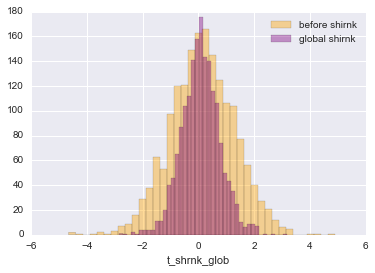

In [29]:
%matplotlib inline
sns.distplot(df['np_t_w'], label='before shirnk', kde=False,color='orange')
# gloabl should is the average of variances for all genes
sns.distplot(df['t_shrnk_glob'], label='global shirnk', kde=False,color='purple')

plt.legend()

Find minimum n for power of 0.7, 0.8, and 0.9

In [31]:
for x in [0.5, 0.6, 0.7, 0.8, 0.9]:
    n = smp.tt_ind_solve_power(effect_size=2, nobs1=None, alpha=0.05, 
                               power=x, ratio=1, alternative='two-sided')
    print(str(x),'\t',str(n))

0.5 	 3.1694302085723525
0.6 	 3.670900711014718
0.7 	 4.280083481920613
0.8 	 5.089994609324693
0.9 	 6.386755384175024


Find power of each CLOvE pair

In [32]:
df['ratio'] = df['neg_n']/df['pos_n']
df['power'] = smp.tt_ind_solve_power(effect_size=df['cohens_d'], nobs1=df['pos_n'], alpha=0.05, power=None, ratio=df['ratio'], alternative='two-sided')

# %matplotlib inline 
# sns.jointplot(data=df, y='np_t_w', x='power')
# plt.suptitle('Power Players')
# plt.subplots_adjust(top=0.95)

In [33]:
df.sort_values(by='power', ascending=False)

,exp,cnv,pos_n,neg_n,pos_mu,neg_mu,pos_var,neg_var,cohens_d,np_t_s,np_p_s,np_t_w,np_p_w,gene_var_exp,ratio,power
3164,ANKFY1,SREBF1,8,51,7.092054,8.068296,0.051477,0.164544,-2.484079,-6.532349,1.905972e-08,-6.532349,1.905972e-08,0.265416,6.375000,1.000000
8427,PPIE,SLC22A12,5,54,6.674806,7.676335,0.189317,0.155850,-2.471186,-5.286417,2.048373e-06,-5.286417,2.048373e-06,0.240565,10.800000,0.999393
9382,C18orf21,CCBE1,14,45,8.395022,9.377898,0.512840,0.394937,-1.485540,-4.854323,9.773950e-06,-4.854323,9.773950e-06,0.608057,3.214286,0.997532
5560,NUP50,STAG3,2,57,8.404887,7.132762,0.001309,0.179465,3.002506,4.173594,1.036101e-04,4.173594,1.036101e-04,0.230328,28.500000,0.983917
219,MIA3,STX12,5,54,9.247302,7.838527,2.193152,0.385193,1.887106,4.036940,1.634069e-04,4.036940,1.634069e-04,0.704284,10.800000,0.977682
5683,MED28,LAP3,5,54,6.705962,7.739105,0.097603,0.318102,-1.855813,-3.969997,2.037474e-04,-3.969997,2.037474e-04,0.388796,10.800000,0.973950
5108,MYO1C,MYO1C,13,46,8.481653,9.274307,0.229964,0.439912,-1.241763,-3.953333,2.151930e-04,-3.953333,2.151930e-04,0.510236,3.538462,0.972943
1836,FAM96B,CTU2,9,50,10.200274,10.814823,0.272060,0.167559,-1.410099,-3.894304,2.609319e-04,-3.894304,2.609319e-04,0.236328,5.555556,0.969114
5965,CDC23,A2M,6,53,10.065974,9.492403,0.161181,0.111930,1.648618,3.827433,3.240492e-04,3.827433,3.240492e-04,0.149526,8.833333,0.964245
4856,ZNF24,SPDYE4,12,47,9.049840,8.242642,0.606404,0.362396,1.236031,3.821580,3.302228e-04,3.821580,3.302228e-04,0.526517,3.916667,0.963790


# Sandbox

In [ ]:
import cloveFunctions as clv

def dfFacetgrid(raw_exp_df_fh):
    n_lis = [5,6,7,8,9,10,16,32]
    v_lis = [0.1, 0.2, 0.5, 1]
    bexp, bcnv = clv.mainFitler(raw_exp_df_fh, var=v_lis[0], n=n_lis[0])
    return bexp, bcnv
    scores = clv.randomPairContextStat(10000, bexp, bcnv, permute=True)
    return scores
    print('scores for n={} and v={}:  {}'.format(n_lis[0], v_lis[0], scores.shape))
    out_df = scores[['np_t_w', 'np_t_w_null']]
    out_df['n'] = str(n_lis[0])
    out_df['v'] = str(v_lis[0])
    for n in n_lis[1:]:
        for v in v_lis[1:]:
            bexp, bcnv = clv.mainFitler(raw_exp_df_fh, var=v, n=n)
            scores = clv.randomPairContextStat(10000, bexp, bcnv, permute=True)
            df = scores[['np_t_w', 'np_t_w_null']]
            df['n'] = str(n)
            df['v'] = str(v)
            out_df = pd.concat([out_df, df])
            print('scores for n={} and v={}:  {}'.format(n, v, scores.shape))
    return out_df

why are the samples not 10000 rows long even though it is specified as such?

In [ ]:
import pandas as pd
import numpy as np
import cloveFunctions as clv
def completeSample(n_samp=10000, expdf_fh='clove/tissueDF_raw/breast_mrna_df.pickle', var=0.1, n=5):
    exp, cnv = clv.mainFitler(expdf_fh=expdf_fh, var=var, n=n)
    print('done')
    scores = clv.randomPairContextStat(10000, exp, cnv, permute=True)
    print('done')
    i = 0
    if scores.shape[0] == n_samp:
        return scores
    while scores.shape[0] < n_samp:
        i += 1
        exp, cnv = clv.mainFitler(expdf_fh=expdf_fh, var=var, n=n)
        scores = clv.randomPairContextStat(10000, exp, cnv, cat_df=scores, permute=True)
        print("attempting iteration {} at len {}".format(i, scores.shape[0]))
    return scores.sample(n_samp)

In [ ]:
bexp, bcnv = clv.mainFitler('clove/tissueDF_raw/breast_mrna_df.pickle', var=0.1, n=5)

In [8]:
bexp = pd.read_pickle('data/breast_mrna_df.pickle')
bcnv = pd.read_csv('data/breast_CCLE_DEL_calls.csv.gz', compression='gzip', sep=',', index_col=0)

In [111]:
def graph_var_dist(df, tissue, y0=0.5, yd=0.05):
    """
    plots distribution of variance in the raw expdf before you decide how to filter
    
    :param df: pandas dataframe, raw expression dataframe gene x sample
    :param tissue: str, name of tissue or cohort of interest, just for labeling
    :param y0: float, top of sig line and label
    :param yd: float, how much y0 should decrease to fit subsequent sig below it
    
    returns None, just displays a plot"""
    var_arr = df.var(axis=1)
    sns.set_style("white")
    plt.xlabel('var')
    sns.distplot(var_arr, color='black', hist=False)

    for x in range (1,4):
        sig=round(np.std(var_arr)*x+np.mean(var_arr), 2)
        n=df[df.var(axis=1) > sig].shape[0]
        plt.plot([sig,sig], [y0, 0], linestyle='dotted', color='gray')
        sig_label = '{}sig={}, n={}'.format(str(x), str(sig), str(n))
        plt.text(sig, y0, sig_label)
        y0 -= yd
    sns.despine()
    plt.title('variance in {} expression, (genes={}, samples={})\n'.format(tissue, df.shape[0], df.shape[1]))
    plt.show()
    
    
def graph_n_dist(df, tissue, y0=0.5, yd=0.05):
    """
    plots distribution of number (n) of +/-bait contexts in the raw cnvdf before you decide how to filter
    
    :param df: pandas dataframe, raw copy number dataframe gene x sample
    :param tissue: str, name of tissue or cohort of interest, just for labeling
    :param y0: float, top of sig line and label
    :param yd: float, how much y0 should decrease to fit subsequent sig below it
    
    returns None, just displays a plot"""
    n_arr = df.sum(axis=1)
    sns.set_style("white")
    plt.xlabel('n')
    sns.distplot(n_arr, color='black', hist=False)

    for x in range (1,4):
        sig=round(np.std(n_arr)*x+np.mean(n_arr), 2)
        n=df[df.sum(axis=1) > sig].shape[0]
        plt.plot([sig,sig], [y0, 0], linestyle='dotted', color='gray')
        sig_label = '{}sig={}, n={}'.format(str(x), str(int(round(sig, 0))), str(n))
        plt.text(sig, y0, sig_label)
        y0 -= yd
    sns.despine()
    plt.title('n of +/-bait in {} copy number, (genes={}, samples={})\n'.format(tissue, df.shape[0], df.shape[1]))
    plt.show()
    
    
def load_data(expdf_fh, cnvdf_fh, details=True, need_subset=False):
    """
    loads exp and cnv data that has been either pre-subsetted  by tissue or not
    
    :param expdf_fh: str, path and handle for expression dataframe
    :param cnvdf_fh: str, path and handle for copy number dataframe
    :param details: bool, shows distribution of var and n to inform later filtering
                    defaults is True, you'll see the graphs (hopefully)
    :param need_subset: bool or str, subsets dataframes by tissue as str
                        default is False, meaning dfs are already subsetted by tissue
    
    returns expdf, cnvdf
    """
    results=[]
    for df in [expdf_fh, cnvdf_fh]:
        if df.endswith('.pickle') or df.endswith('.p'):
            results.append(pd.read_pickle(df))
        else: results.append(pd.read_csv(df, compression='infer', sep=None, index_col=0)) # sep None infers seps, cool right?
    if details:
        if need_subset:
            t=need_subset
        else: t="'tissue'"
        graph_var_dist(results[0], tissue=t, y0=0.30)
        graph_n_dist(results[1], tissue=t, y0=0.30)
    
    return results[0], results[1]

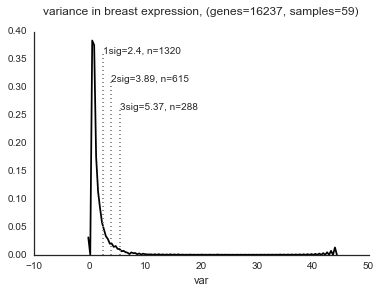

In [94]:
graph_var_dist(bexp, tissue='breast', y0=0.36)

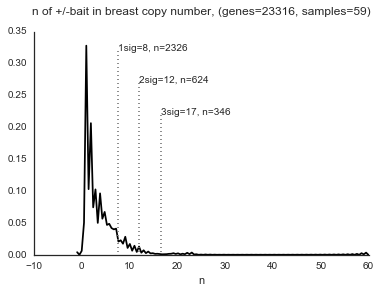

In [95]:
graph_n_dist(bcnv, tissue='breast', y0=0.32) # 7.6, 12.09, 16.57

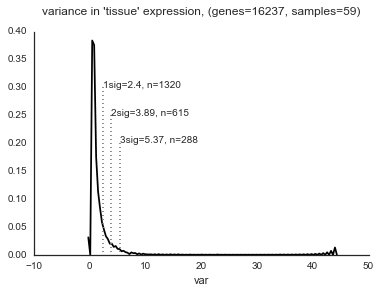

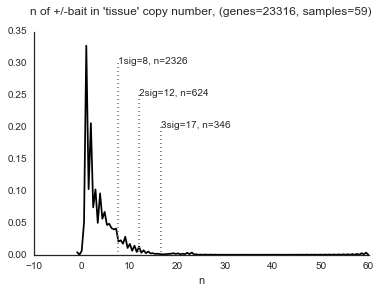

In [110]:
expdf, cnvdf = load_data('data/breast_mrna.tab.gz', 'data/breast_CCLE_DEL_calls.csv.gz')